In [1]:
import numpy as np
import matplotlib.pylab as plt
import mnist
import os, sys

# Append directory path
sys.path.append(os.path.abspath('../../'))

In [2]:
from neuralnetwork import NeuralNetwork

In [3]:
# Creating an one-dimension vector, each element corresponds to a digit 
def one_hot(arr, size):
    temp = np.zeros((arr.shape[0], size))
    for i in range(arr.shape[0]):
        temp[i][arr[i]] = 1.

    return temp

In [4]:
# Initializing the trainable data
train_data = mnist.train_images().reshape(60000, 784, 1) / 255 # Division by 255 is used to prevent overflow 
train_labels = one_hot(mnist.train_labels(), 10)

In [5]:
# Initializing the network's parameters
nn = NeuralNetwork([
    {'input_size': 784, 'neurons_size': 64, 'activation': 'sigmoid'}, # I didn't use ReLU because it causes exploding gradients
    {'input_size': 64, 'neurons_size': 64, 'activation': 'sigmoid'},
    {'input_size': 64, 'neurons_size': 10, 'activation': 'softmax'},
])

Epoch: #1/5 
 Loss: [0.43239849]
Epoch: #2/5 
 Loss: [0.23636747]
Epoch: #3/5 
 Loss: [0.18846334]
Epoch: #4/5 
 Loss: [0.15737178]
Epoch: #5/5 
 Loss: [0.13527139]


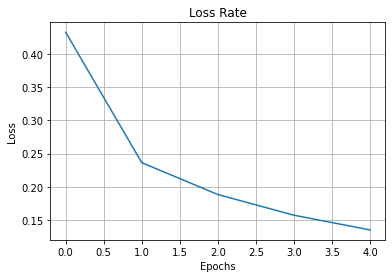

In [6]:
# Backprogation
nn.back_prop(
    X=train_data, 
    Y=train_labels, 
    epochs=5, 
    learn_rate=0.01, 
    loss_func='CrossEntropyLoss'
)

In [7]:
# Initializing testing data 
test_data = mnist.test_images()[:1000].reshape(1000, 784, 1)

Prediction:
 4


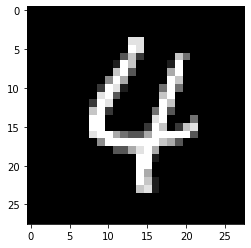

Prediction:
 8


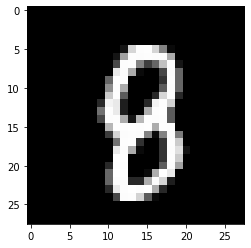

Prediction:
 3


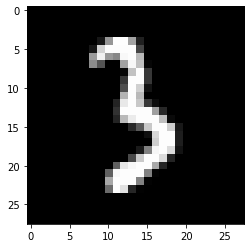

Prediction:
 8


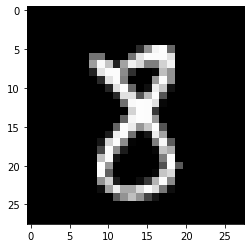

Prediction:
 8


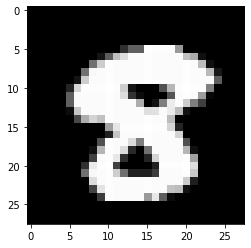

In [8]:
# Testing
for i in range(5):
    idx = np.random.randint(0, 1000)

    input = test_data[idx]
    pred = np.argmax(np.round(nn.forward_propagation(input)))
    
    print('Prediction:\n', pred)
    
    plt.imshow(input.reshape(28, 28), cmap='gray')
    plt.show()